In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import FinanceDataReader as fdr
import seaborn as sns

plt.rc('font', family='Malgun Gothic')  # For Windows

In [3]:
samsung = fdr.DataReader('005930')
print(samsung.info())
print(samsung)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3000 entries, 2013-10-29 to 2026-01-16
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3000 non-null   int64  
 1   High    3000 non-null   int64  
 2   Low     3000 non-null   int64  
 3   Close   3000 non-null   int64  
 4   Volume  3000 non-null   int64  
 5   Change  2999 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 164.1 KB
None
              Open    High     Low   Close    Volume    Change
Date                                                          
2013-10-29   29800   29800   29560   29800    206698       NaN
2013-10-30   29700   30000   29680   30000    211768  0.006711
2013-10-31   29960   30040   29300   29300    252941 -0.023333
2013-11-01   29800   30000   29360   30000    227154  0.023891
2013-11-04   29840   30040   29780   29980    217756 -0.000667
...            ...     ...     ...     ...       ...       ...
2026-01-12  141000 

In [4]:
samsung_krx = fdr.DataReader('KRX:005930')
print(samsung_krx.info())
print(samsung_krx)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7743 entries, 1995-05-02 to 2026-01-16
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    7743 non-null   int64  
 1   High    7743 non-null   int64  
 2   Low     7743 non-null   int64  
 3   Close   7743 non-null   int64  
 4   Volume  7743 non-null   int64  
 5   Change  7743 non-null   float64
 6   UpDown  7743 non-null   int64  
 7   Comp    7743 non-null   int64  
 8   Amount  7743 non-null   int64  
 9   MarCap  7743 non-null   int64  
 10  Shares  7743 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 725.9 KB
None
              Open    High     Low   Close    Volume  Change  UpDown  Comp  \
Date                                                                         
1995-05-02  121000  121000  118500  119500    139560 -0.0083       2 -1000   
1995-05-03  119500  126500  119500  123500    382980  0.0335       1  4000   
1995-05-04  124000  1245

In [6]:
print(samsung_krx.loc['2017-12-20':'2018-01-05'])
print(samsung_krx.loc['2018-04-26':'2018-05-05'])

               Open     High      Low    Close  Volume  Change  UpDown   Comp  \
Date                                                                            
2017-12-20  2575000  2588000  2541000  2544000  201611 -0.0132       2 -34000   
2017-12-21  2550000  2553000  2455000  2457000  312486 -0.0342       2 -87000   
2017-12-22  2470000  2498000  2462000  2485000  223993  0.0114       1  28000   
2017-12-26  2488000  2505000  2410000  2410000  320797 -0.0302       2 -75000   
2017-12-27  2448000  2478000  2423000  2468000  214872  0.0241       1  58000   
2017-12-28  2478000  2548000  2475000  2548000  179709  0.0324       1  80000   
2018-01-02  2569000  2570000  2539000  2551000  169485  0.0012       1   3000   
2018-01-03  2627000  2628000  2571000  2581000  200270  0.0118       1  30000   
2018-01-04  2606000  2609000  2532000  2554000  233909 -0.0105       2 -27000   
2018-01-05  2565000  2606000  2560000  2606000  189623  0.0204       1  52000   

                  Amount   

In [7]:
stock = samsung_krx[['Close', 'Volume']].copy()
split_date = pd.Timestamp('2018-05-01')
stock['Close'] = stock.apply(lambda x: int(x['Close'] / 50) if x.name < split_date else x['Close'], axis=1)
stock['Volume'] = stock.apply(lambda x: int(x['Volume'] * 50) if x.name < split_date else x['Volume'], axis=1)
stock = stock[stock['Volume'] != 0]
print(stock.loc['2017-12-20':'2018-01-05'])
print(stock.loc['2018-04-26':'2018-05-05'])

            Close    Volume
Date                       
2017-12-20  50880  10080550
2017-12-21  49140  15624300
2017-12-22  49700  11199650
2017-12-26  48200  16039850
2017-12-27  49360  10743600
2017-12-28  50960   8985450
2018-01-02  51020   8474250
2018-01-03  51620  10013500
2018-01-04  51080  11695450
2018-01-05  52120   9481150
            Close    Volume
Date                       
2018-04-26  52140  18046550
2018-04-27  53000  30310800
2018-05-04  51900  39565391


<Axes: title={'center': '005930_삼성전자'}, xlabel='Date'>

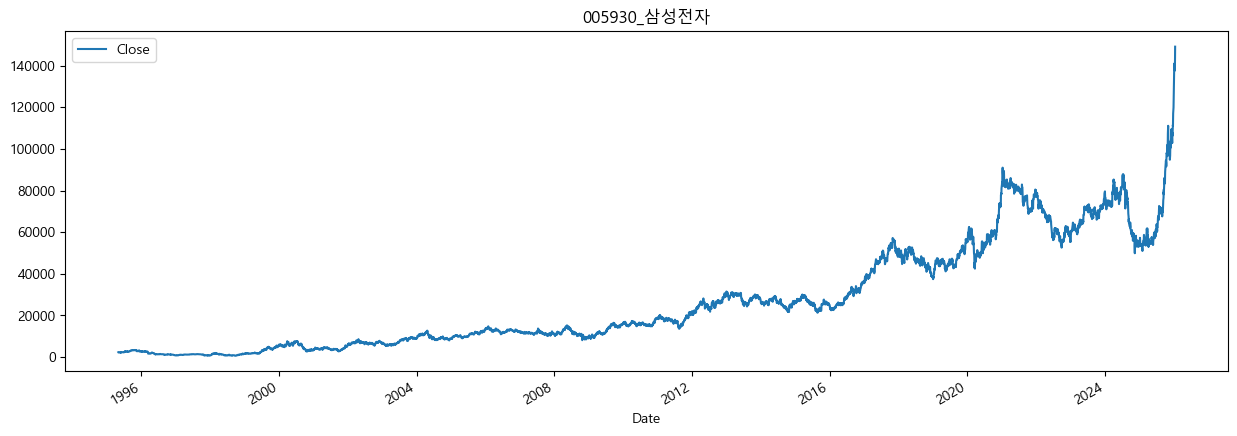

In [8]:
# 전체 기간
stock.plot(y='Close', title='005930_삼성전자', figsize=(15,5))

<Axes: title={'center': '005930_삼성전자'}, xlabel='Date'>

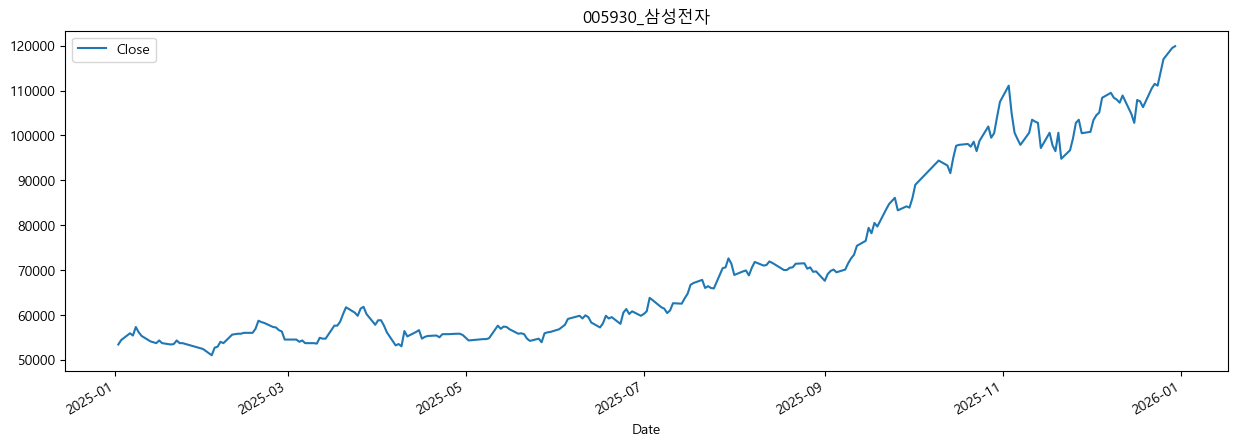

In [9]:
# YTD
stock.loc['2025'].plot(y='Close', title='005930_삼성전자', figsize=(15,5))


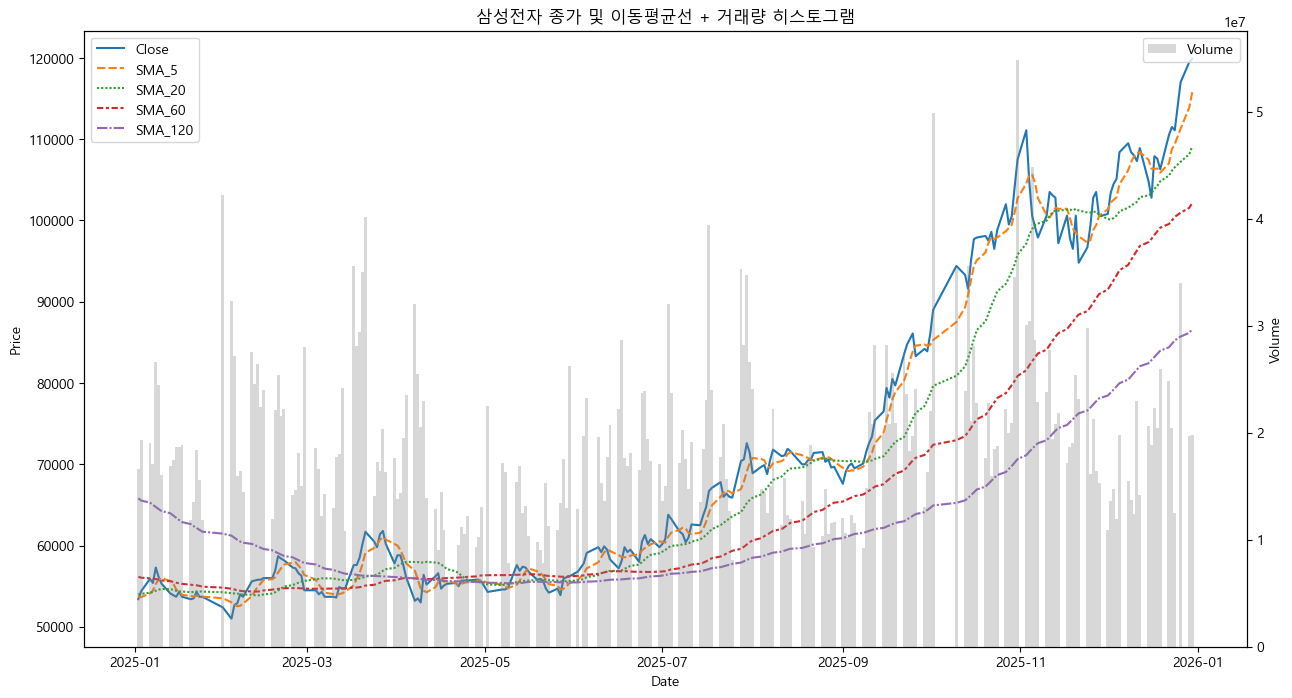

In [13]:
# 이동평균선 계산
stock['SMA_5'] = stock['Close'].rolling(window=5).mean()
stock['SMA_20'] = stock['Close'].rolling(window=20).mean()
stock['SMA_60'] = stock['Close'].rolling(window=60).mean()
stock['SMA_120'] = stock['Close'].rolling(window=120).mean()

fig, ax1 = plt.subplots(figsize=(15, 8))

# 종가 및 이동평균선 라인플롯
sns.lineplot(data=stock.loc['2025'][['Close', 'SMA_5', 'SMA_20', 'SMA_60', 'SMA_120']], ax=ax1)
ax1.set_title('삼성전자 종가 및 이동평균선 + 거래량 히스토그램')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')

# 거래량 히스토그램 (세컨더리 y축)
ax2 = ax1.twinx()
ax2.bar(stock.loc['2025'].index, stock.loc['2025']['Volume'], color='gray', alpha=0.3, label='Volume', width=1)
ax2.set_ylabel('Volume')
ax2.legend(loc='upper right')

plt.show()